# Apply PCA and K-Means to our data
Based on [Principal Component Analysis](https://www.kaggle.com/nirajvermafcb/principal-component-analysis-explained) explained notebook

## Prepare workspace

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Coursework

Mounted at /content/drive
/content/drive/MyDrive/Coursework


In [5]:
df = pd.read_csv('collection_final.csv')
df = df.drop(["index", "index.1"], axis=1)

In [6]:
columns_names=df.columns.tolist()
print("Columns names:")
print(columns_names)

Columns names:
['title', 'category', 'jingle_fname', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'genre', 'key']


In [7]:
df.shape

(91, 63)

**Visualising correlation using Seaborn library**

Text(0.5, 1.0, 'Correlation between different fearures')

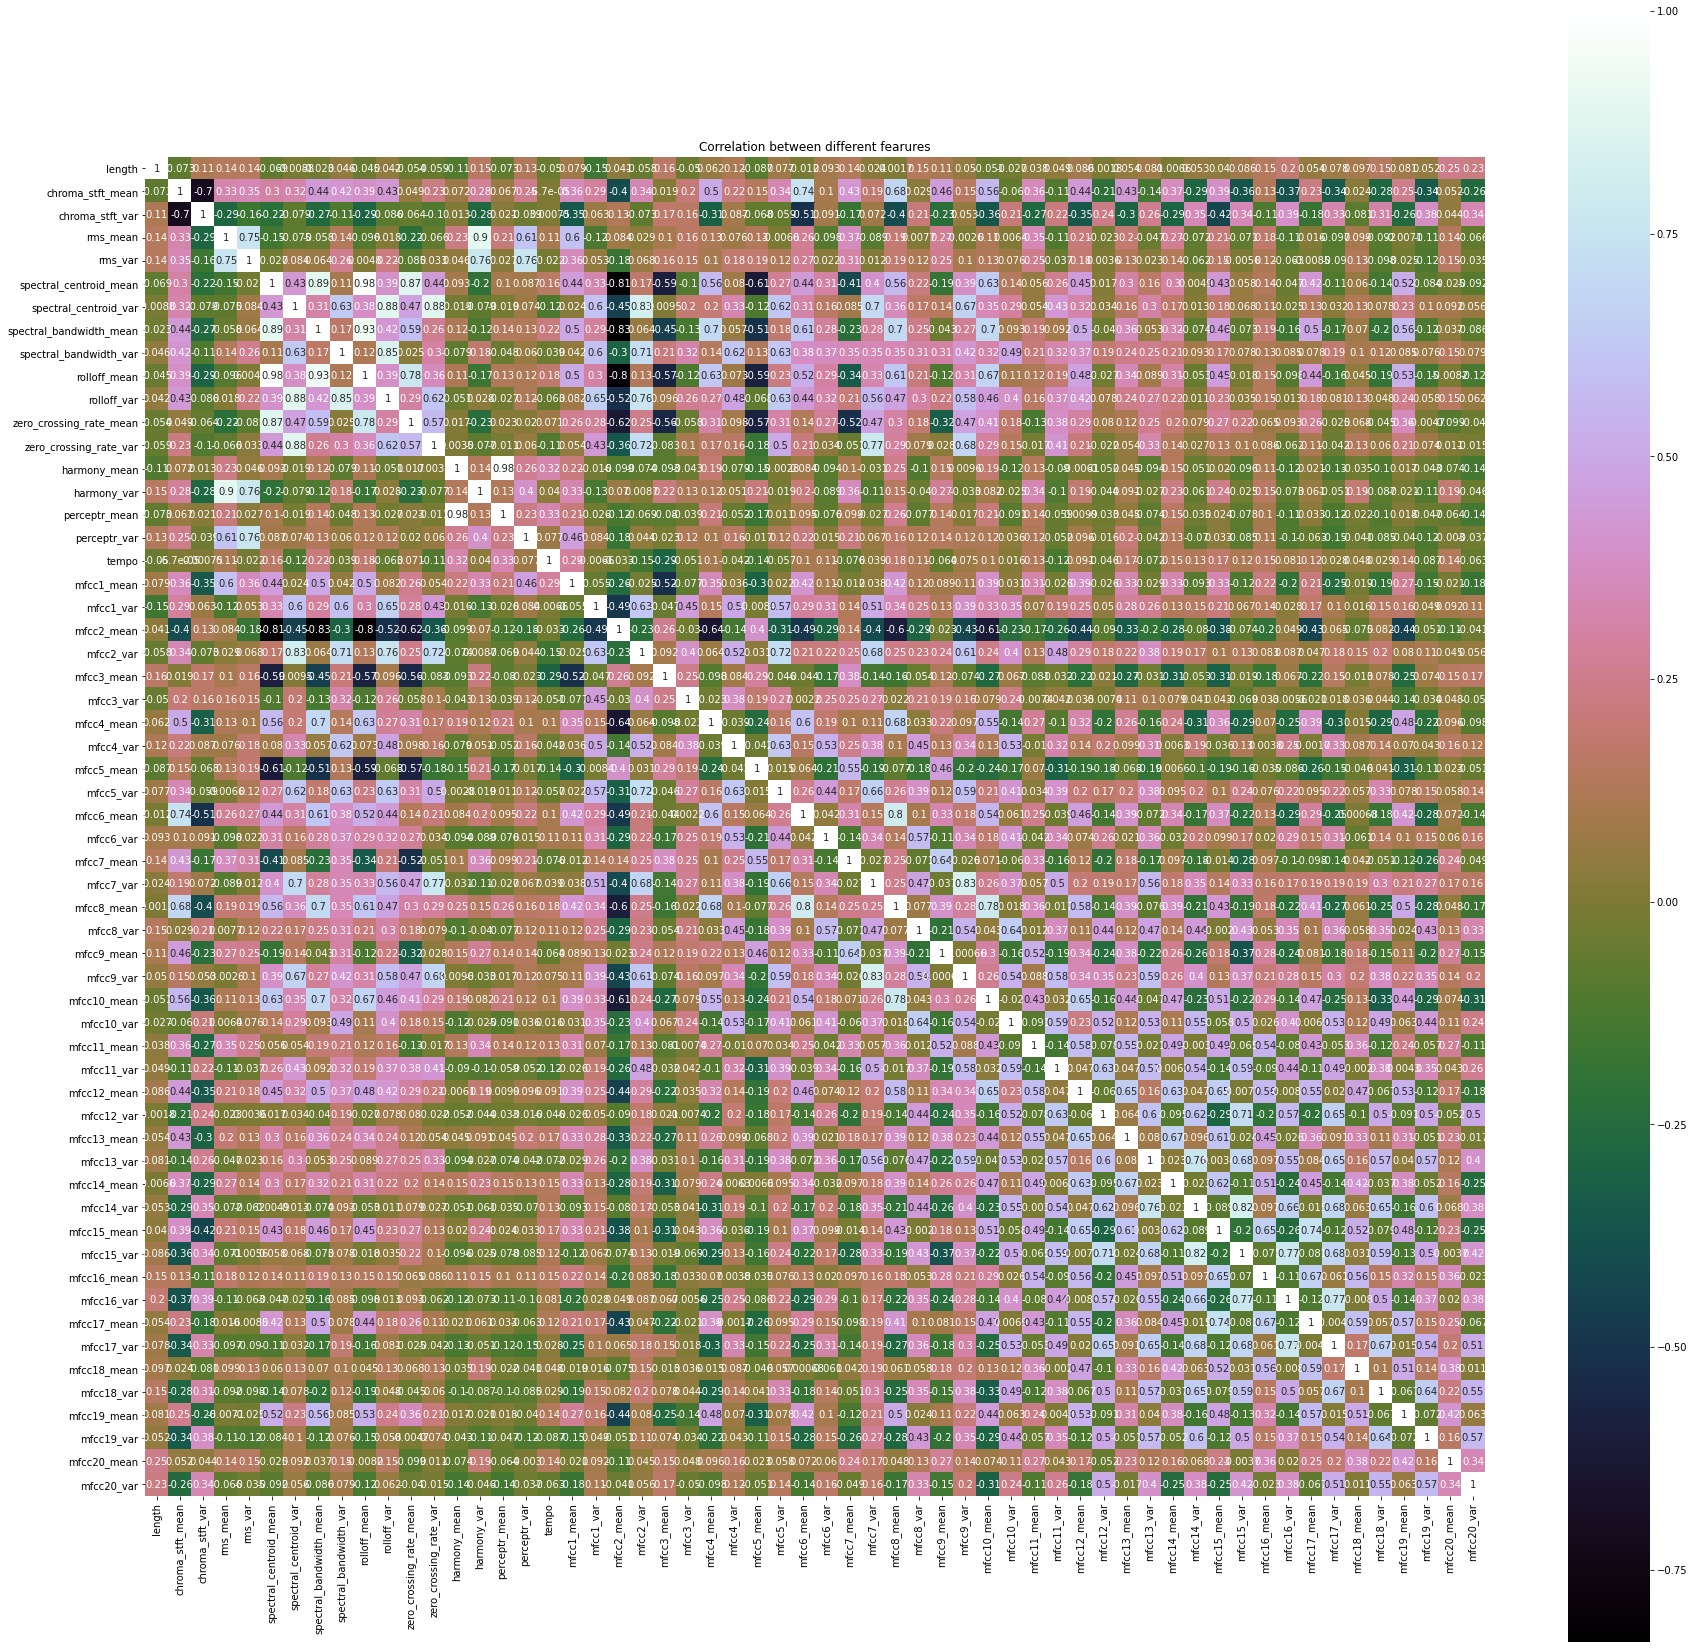

In [8]:
correlation = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

## Data Investigation

In [9]:
df.head()

,title,category,jingle_fname,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre,key
0,Маркетинговая рубка,Бизнес и работа,marketingovaja_rubka_jingle.mp3,142042.0,0.523319,0.080477,0.239205,0.006020,1025.383369,7.006772e+05,1202.753991,386913.000057,1818.703631,2.078881e+06,0.028598,0.001030,3.736492e-05,0.046522,-7.835532e-05,0.003280,123.046875,-231.748962,3103.459229,212.946884,2930.586182,12.513800,4623.644043,19.105061,467.726471,5.030952,236.045013,-2.228312,220.548218,-1.123686,177.162369,0.277413,149.164337,2.571347,108.259552,-7.404360,171.555649,-1.365540,113.603851,4.239980,66.434166,1.365911,52.626217,2.800501,80.335533,-0.051003,51.941879,-5.523403,43.254219,-2.571922,57.793007,-0.125582,66.386177,-2.490745,40.758774,-2.534305,32.764755,Jazz,D Maj
1,Богема и Маркетинг,Бизнес и работа,bogema_i_marketing_jingle.mp3,749665.0,0.585561,0.079283,0.203885,0.025898,2968.117499,3.482309e+06,3355.042342,844051.703639,6071.995820,1.303381e+07,0.070408,0.006866,-4.122400e-05,0.024928,-4.046299e-04,0.025166,101.332721,-188.308228,9931.254883,111.782677,1893.326294,-12.020305,1259.591919,25.170738,775.714844,3.024860,552.291626,35.339745,279.792999,-0.668745,254.616592,17.027832,169.616470,1.320320,207.537415,8.867274,96.429733,0.133203,100.227135,5.639186,123.144058,7.281498,101.863182,1.281500,62.686546,0.706779,63.990139,0.514493,57.779900,0.745295,52.988716,-2.067150,51.583660,2.469604,45.067448,-4.989278,55.858395,Hiphop,c min
2,Взяла и сделала,Бизнес и работа,vzjala_i_sdelala_jingle.mp3,371174.0,0.468158,0.096737,0.079686,0.001555,1431.330232,9.716797e+05,2385.751432,798386.984567,2432.717336,5.206571e+06,0.023904,0.000412,3.575737e-05,0.005938,1.413868e-05,0.000939,161.499023,-316.207489,5948.076660,170.428940,1159.067749,19.617813,636.093689,17.945576,1222.478394,-14.396377,353.562439,9.757913,553.830078,-14.285516,239.479401,3.491692,354.133881,-11.964690,175.335648,-10.523744,222.819489,-1.700398,133.961136,-3.436929,117.719193,-12.358438,136.364365,-6.831427,156.342911,-5.077763,121.822144,-4.690271,90.061066,0.502984,112.494377,-2.934301,66.612946,3.229903,133.437378,1.159944,59.666756,Reggae,d min
3,Нормальные деньги,Бизнес и работа,normalnye_dengi_jingle.mp3,335923.0,0.213703,0.085156,0.016950,0.000016,953.269353,2.552213e+04,1607.884108,69273.251521,1318.605522,8.751774e+04,0.022546,0.000014,-8.578223e-07,0.000288,-6.280721e-07,0.000003,117.453835,-502.185181,897.676270,191.661621,100.873932,10.708053,155.908173,18.455069,136.740601,1.307206,120.384735,-0.174697,59.064034,-13.879776,79.223717,-16.200943,51.325783,-12.252262,48.379940,-20.332392,74.404602,-17.715492,122.001358,-15.897592,58.343239,-2.009305,42.525867,1.345816,65.775887,-3.558075,51.752151,-7.761858,45.630013,-8.574019,107.765938,-0.798433,95.431763,2.630621,70.147438,7.070975,68.876877,Classical,A Maj
4,ПЛЮС-МИНУС ДЕНЬГИ,Бизнес и работа,pljusminus_dengi_jingle.mp3,234330.0,0.381161,0.090714,0.048251,0.000681,2922.083227,2.185865e+06,2444.837590,909751.585725,5222.036836,6.671021e+06,0.110253,0.003129,8.429411e-06,0.000971,1.120523e-04,0.001254,126.048018,-276.575165,9813.832031,147.371689,2344.169678,-58.614056,885.815796,33.445972,978.096497,1.956552,932.756958,9.531117,441.969513,-6.864183,175.491913,2.662849,174.354248,-9.559438,122.760071,7.085250,94.914268,0.712970,122.430679,-1.

In [10]:
df_drop = df.drop(labels=["title", "category", "jingle_fname", "genre", "key"],axis=1)
df_drop.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,142042.0,0.523319,0.080477,0.239205,0.006020,1025.383369,7.006772e+05,1202.753991,386913.000057,1818.703631,2.078881e+06,0.028598,0.001030,3.736492e-05,0.046522,-7.835532e-05,0.003280,123.046875,-231.748962,3103.459229,212.946884,2930.586182,12.513800,4623.644043,19.105061,467.726471,5.030952,236.045013,-2.228312,220.548218,-1.123686,177.162369,0.277413,149.164337,2.571347,108.259552,-7.404360,171.555649,-1.365540,113.603851,4.239980,66.434166,1.365911,52.626217,2.800501,80.335533,-0.051003,51.941879,-5.523403,43.254219,-2.571922,57.793007,-0.125582,66.386177,-2.490745,40.758774,-2.534305,32.764755
1,749665.0,0.585561,0.079283,0.203885,0.025898,2968.117499,3.482309e+06,3355.042342,844051.703639,6071.995820,1.303381e+07,0.070408,0.006866,-4.122400e-05,0.024928,-4.046299e-04,0.025166,101.332721,-188.308228,9931.254883,111.782677,1893.326294,-12.020305,1259.591919,25.170738,775.714844,3.024860,552.291626,35.339745,279.792999,-0.668745,254.616592,17.027832,169.616470,1.320320,207.537415,8.867274,96.429733,0.133203,100.227135,5.639186,123.144058,7.281498,101.863182,1.281500,62.686546,0.706779,63.990139,0.514493,57.779900,0.745295,52.988716,-2.067150,51.583660,2.469604,45.067448,-4.989278,55.858395
2,371174.0,0.468158,0.096737,0.079686,0.001555,1431.330232,9.716797e+05,2385.751432,798386.984567,2432.717336,5.206571e+06,0.023904,0.000412,3.575737e-05,0.005938,1.413868e-05,0.000939,161.499023,-316.207489,5948.076660,170.428940,1159.067749,19.617813,636.093689,17.945576,1222.478394,-14.396377,353.562439,9.757913,553.830078,-14.285516,239.479401,3.491692,354.133881,-11.964690,175.335648,-10.523744,222.819489,-1.700398,133.961136,-3.436929,117.719193,-12.358438,136.364365,-6.831427,156.342911,-5.077763,121.822144,-4.690271,90.061066,0.502984,112.494377,-2.934301,66.612946,3.229903,133.437378,1.159944,59.666756
3,335923.0,0.213703,0.085156,0.016950,0.000016,953.269353,2.552213e+04,1607.884108,69273.251521,1318.605522,8.751774e+04,0.022546,0.000014,-8.578223e-07,0.000288,-6.280721e-07,0.000003,117.453835,-502.185181,897.676270,191.661621,100.873932,10.708053,155.908173,18.455069,136.740601,1.307206,120.384735,-0.174697,59.064034,-13.879776,79.223717,-16.200943,51.325783,-12.252262,48.379940,-20.332392,74.404602,-17.715492,122.001358,-15.897592,58.343239,-2.009305,42.525867,1.345816,65.775887,-3.558075,51.752151,-7.761858,45.630013,-8.574019,107.765938,-0.798433,95.431763,2.630621,70.147438,7.070975,68.876877
4,234330.0,0.381161,0.090714,0.048251,0.000681,2922.083227,2.185865e+06,2444.837590,909751.585725,5222.036836,6.671021e+06,0.110253,0.003129,8.429411e-06,0.000971,1.120523e-04,0.001254,126.048018,-276.575165,9813.832031,147.371689,2344.169678,-58.614056,885.815796,33.445972,978.096497,1.956552,932.756958,9.531117,441.969513,-6.864183,175.491913,2.662849,174.354248,-9.559438,122.760071,7.085250,94.914268,0.712970,122.430679,-1.526303,43.769630,-7.425136,66.331169,-1.009431,46.595848,1.051408,50.187279,-0.298911,76.972878,0.625926,51.477322,-5.520314,44.622707,-2.075430,34.462612,-5.531204,55.854454


In [11]:
X = df_drop.values
X

array([[ 1.42042000e+05,  5.23319185e-01,  8.04767013e-02, ...,
         4.07587738e+01, -2.53430533e+00,  3.27647552e+01],
       [ 7.49665000e+05,  5.85561156e-01,  7.92831331e-02, ...,
         4.50674477e+01, -4.98927832e+00,  5.58583946e+01],
       [ 3.71174000e+05,  4.68158007e-01,  9.67368931e-02, ...,
         1.33437378e+02,  1.15994358e+00,  5.96667557e+01],
       ...,
       [ 5.25658000e+05,  6.40698671e-01,  6.40343502e-02, ...,
         2.43488197e+01, -1.58462501e+00,  3.24852638e+01],
       [ 2.04250000e+05,  5.34489930e-01,  7.85045847e-02, ...,
         2.56547813e+01, -4.36217451e+00,  2.70937843e+01],
       [ 1.73146000e+05,  5.16004086e-01,  8.77226740e-02, ...,
         3.94544716e+01, -5.79327822e+00,  2.22122459e+01]])

## Data Standardisation
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data 

In [12]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Computing Eigenvectors and Eigenvalues

### Covariance matrix

In [13]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.01111111 -0.07367964  0.11466553 ...  0.05214932  0.24821082
   0.23320354]
 [-0.07367964  1.01111111 -0.71063589 ... -0.34198039  0.05217384
  -0.26073952]
 [ 0.11466553 -0.71063589  1.01111111 ...  0.38452466  0.04498767
   0.3407868 ]
 ...
 [ 0.05214932 -0.34198039  0.38452466 ...  1.01111111  0.16179019
   0.57504788]
 [ 0.24821082  0.05217384  0.04498767 ...  0.16179019  1.01111111
   0.34406778]
 [ 0.23320354 -0.26073952  0.3407868  ...  0.57504788  0.34406778
   1.01111111]]


In [14]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.01111111 -0.07367964  0.11466553 ...  0.05214932  0.24821082
   0.23320354]
 [-0.07367964  1.01111111 -0.71063589 ... -0.34198039  0.05217384
  -0.26073952]
 [ 0.11466553 -0.71063589  1.01111111 ...  0.38452466  0.04498767
   0.3407868 ]
 ...
 [ 0.05214932 -0.34198039  0.38452466 ...  1.01111111  0.16179019
   0.57504788]
 [ 0.24821082  0.05217384  0.04498767 ...  0.16179019  1.01111111
   0.34406778]
 [ 0.23320354 -0.26073952  0.3407868  ...  0.57504788  0.34406778
   1.01111111]]


### Eigen decomposition of the covariance matrix

In [15]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[-0.00838711  0.02620261 -0.06655486 ...  0.05157847  0.00477754
  -0.04902277]
 [-0.17127265 -0.14163305 -0.13829594 ...  0.15951694  0.06524353
   0.061857  ]
 [ 0.09222356  0.17181855  0.03255722 ...  0.10195815  0.09798399
  -0.01280296]
 ...
 [ 0.00407096  0.21600775  0.00702296 ...  0.04469363 -0.09274078
  -0.17048008]
 [-0.05891846  0.0199522  -0.11302827 ...  0.06271109 -0.07674311
  -0.00600284]
 [ 0.01436643  0.18293529 -0.02657809 ...  0.02490562 -0.00532924
   0.0121975 ]]

Eigenvalues 
[1.24207320e+01 9.57416478e+00 5.66686671e+00 4.32881324e+00
 3.24105593e+00 2.20229136e+00 2.02445381e+00 1.82879090e+00
 1.72125200e+00 1.22509804e+00 1.18798605e+00 1.08182779e+00
 9.52165231e-01 9.61160879e-01 8.71735586e-01 8.10716497e-01
 7.69332959e-01 7.14781976e-01 5.86417449e-01 5.89385404e-01
 5.47810054e-01 4.61524882e-01 4.34471519e-01 3.97455795e-01
 3.70244570e-01 3.51400135e-01 3.13377779e-01 2.99861679e-01
 2.62310611e-01 2.58848015e-01 2.34045182e-01 2.24649

## Selecting Principal Components

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
12.42073204802743
9.574164777818615
5.666866710635254
4.328813238526888
3.241055925376634
2.2022913644458977
2.024453813260567
1.8287909033728287
1.721251996245077
1.2250980433199448
1.1879860523701546
1.081827786231565
0.9611608788831997
0.9521652311893203
0.87173558597925
0.8107164967493635
0.769332959072241
0.7147819755275313
0.5893854037751582
0.5864174493778345
0.5478100535703732
0.46152488205837366
0.43447151947855916
0.397455794717794
0.37024456982961695
0.35140013530144215
0.3133777789826036
0.2998616791117057
0.2623106109133258
0.25884801512293365
0.2340451822573293
0.2246494892822302
0.1962383757534715
0.1749636254285234
0.1569830560965264
0.13433064312561072
0.1312466322360106
0.1137382787426601
0.09756016738961014
0.09586251762844951
0.08510772369919097
0.07989368015316393
0.07210001636787775
0.06664661603764035
0.054825716731139666
0.0523432547237764
0.040650039444110664
0.036473512486407206
0.03216235731105992
0.0253094151407918
0.02373939

**Explained Variance**
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [17]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

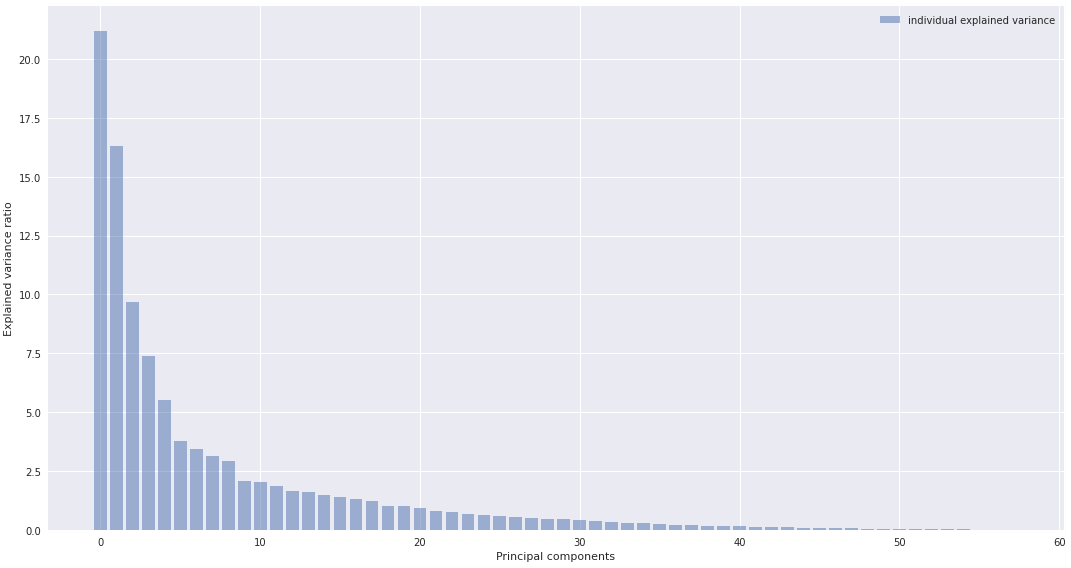

In [18]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15, 8))

    plt.bar(range(len(eig_pairs)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above shows that although first five components explain ~40% of the variety, we do not get to reasonable ~90% until around component 20. So,

In [19]:
sum(var_exp[20:])

10.035760181572059

– and that suits us: let's limit the data by that.

In [20]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=20)
X_proj = sklearn_pca.fit_transform(X_std)

In [21]:
X_proj

array([[-1.24744999, -0.21340201, -3.80707606, ...,  2.04520922,
        -1.16347083, -0.37042604],
       [ 5.2267862 , -0.45814174, -2.86851668, ..., -2.00858213,
         1.03178585, -0.93491   ],
       [-0.41903239,  6.01893634, -0.02456539, ..., -0.67431454,
         0.2115485 , -1.57845379],
       ...,
       [-0.70444742, -4.5777405 , -2.95879088, ...,  0.3084287 ,
        -0.02434408, -0.13994369],
       [ 0.19259021, -2.23739192,  1.10763746, ..., -0.44600442,
         0.37550986, -0.56992523],
       [ 2.45013046, -6.58581476,  0.86268851, ..., -0.50221368,
         0.32138306,  0.16557268]])

## K-Means clustering

Now we cluster the resulting transformed dataset with K-Means using 8 clusters (the number of original categories), plot and save our data: 

In [24]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=8, random_state=42)
clusterer.fit(X_proj)

labels = clusterer.labels_
labels

array([7, 3, 0, 4, 2, 2, 7, 3, 4, 3, 6, 1, 2, 2, 0, 2, 4, 2, 2, 7, 7, 2,
       2, 2, 1, 4, 2, 7, 2, 0, 2, 7, 7, 7, 7, 7, 0, 2, 7, 1, 1, 1, 2, 0,
       7, 5, 0, 1, 2, 7, 1, 2, 1, 1, 4, 6, 2, 7, 7, 3, 7, 4, 7, 1, 7, 6,
       4, 7, 2, 0, 2, 0, 7, 4, 0, 7, 7, 2, 3, 7, 4, 2, 2, 7, 3, 2, 1, 2,
       1, 2, 1], dtype=int32)

In [26]:
df["kmeans_clusters"] = labels
df.to_csv("collection_final.csv", index=False)

In [27]:
df.loc[df["kmeans_clusters"]==4]

,title,category,jingle_fname,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,genre,key,kmeans_clusters,embeddings_clusters
3,Нормальные деньги,Бизнес и работа,normalnye_dengi_jingle.mp3,335923.0,0.213703,0.085156,0.016950,0.000016,953.269353,2.552213e+04,1607.884108,69273.251521,1318.605522,8.751774e+04,0.022546,0.000014,-8.578223e-07,0.000288,-6.280721e-07,0.000003,117.453835,-502.185181,897.676270,191.661621,100.873932,10.708053,155.908173,18.455069,136.740601,1.307206,120.384735,-0.174697,59.064034,-13.879776,79.223717,-16.200943,51.325783,-12.252262,48.379940,-20.332392,74.404602,-17.715492,122.001358,-15.897592,58.343239,-2.009305,42.525867,1.345816,65.775887,-3.558075,51.752151,-7.761858,45.630013,-8.574019,107.765938,-0.798433,95.431763,2.630621,70.147438,7.070975,68.876877,Classical,A Maj,4,2
8,Pokolenie Zero,Бизнес и работа,pokolenie_zero_jingle.mp3,633485.0,0.336499,0.102590,0.013769,0.000022,465.666963,1.831566e+04,1005.814989,53102.615454,609.139181,1.631603e+05,0.015623,0.000026,-3.514821e-07,0.000188,-1.230290e-06,0.000005,74.898098,-618.423279,905.963440,198.753235,750.151733,115.973335,113.717285,36.309132,611.683899,-6.712317,376.509674,-14.799652,46.942760,-8.872656,53.858616,-4.620631,40.891685,-4.620506,22.879532,-5.933311,20.785625,-7.651587,15.704963,-10.764020,13.972795,-14.714528,16.209305,-16.655704,22.652637,-14.142660,59.779976,-7.867827,116.618828,-1.244151,94.013115,2.596243,35.217361,2.910631,67.358482,0.745031,85.717171,Classical,d# min,4,2
16,Na Zdorovie,Здоровье и лайфстайл,na_zdorovie_jingle.mp3,413683.0,0.402751,0.089353,0.085248,0.000437,861.353704,1.710227e+05,1050.876484,245044.023026,1533.814323,8.590989e+05,0.022554,0.000085,-4.279866e-06,0.005404,6.648287e-07,0.000469,99.384014,-320.721588,3149.657715,247.953491,810.664368,9.096069,2018.279663,-5.975529,711.952637,2.687678,237.805817,-2.684940,90.080391,-5.692810,137.756271,-5.382480,55.855175,-0.457008,48.326260,-3.758947,34.667988,-11.023500,32.592129,-11.606598,28.668392,-9.072034,28.236322,-6.658881,20.840435,-7.025640,23.188261,-8.653574,26.802401,-7.664894,30.287966,-6.731726,39.996368,-3.099853,35.662365,-1.537179,28.512541,Jazz,D Maj,4,2
25,Так нельзя 18+,Здоровье и лайфстайл,tak_nelzja_18_jingle.mp3,217184.0,0.318714,0.086523,0.045533,0.000101,604.103451,9.903128e+03,945.695100,25953.406548,967.372817,7.624145e+04,0.015794,0.000019,-1.975647e-03,0.001789,-2.605742e-03,0.000103,99.384014,-431.953064,1642.833252,236.125916,354.482391,19.439444,279.554474,-9.338231,178.086395,28.668190,59.335056,18.345497,67.033081,-3.490765,48.569908,-5.874189,78.690735,-12.534125,36.064487,-17.581287,50.165066,-12.020997,68.420288,-9.663488,25.000235,-9.153825,29.160776,-9.533131,54.022873,-7.087332,38.171532,-2.768877,38.081936,-4.387142,39.863457,-8.948428,32.802521,-8.606404,31.471811,-5.995934,37.132294,Classical,d min,4,1
54,От хора до хардкора,Музыка,ot_hora_do_hardkora_jingle.mp3,333396.0,0.304395,0.092414,0.149465,0.001023,920.445965,4.064470e+04,947.494894,28960.469248,1696.598432,1.914896e+05,0.025942,0.000069,-6.344999e-07,0.020019,-2.862155e-05,0.000537,129.199219,-263.416473,1198.913086,242.066528,130.348389,-26.614750,632.361023,-17.887520,149.292755,24.148420,91.364433,-9.776233,108.543259,-14.873938,84.848885,-7.945722,64.177650,-17.103224,54.612179,-16.577297,43.463692

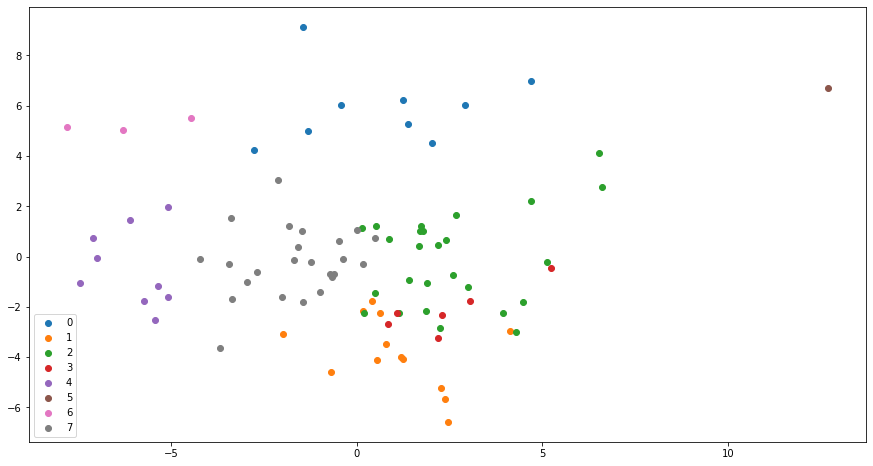

In [28]:
#Getting unique labels

plot_pca = PCA(2)
 
#Transform the data
pdf = plot_pca.fit_transform(X_proj)

u_labels = np.unique(labels)
 
#plotting the results:

plt.figure(figsize=(15, 8))
for i in u_labels:
    plt.scatter(pdf[labels == i , 0], pdf[labels == i , 1] , label = i)
plt.legend()
plt.show()